# Shumovskaia Valentina, hw #3.

In [68]:
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import scipy.signal
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import trimesh
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? **Note:** to make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering.<span style="color:blue">$\checkmark$</span>

<span style="color:blue">_Solution_</span>.

Let $A \in \mathbb{R}^{n_1 \times m_1}, B \in \mathbb{R}^{n_2 \times m_2}$, then $X \in \mathbb{R}^{n_1 \times m_2}$. Consider the $k$-th column of $AXB$:
$$
(AXB)_k =
A\begin{bmatrix}
\begin{bmatrix} x_{11}\\ \dots \\ x_{1m_2} \end{bmatrix}b_{1k} + \dots + \begin{bmatrix} x_{n_11}\\ \dots \\ x_{n_1m_2} \end{bmatrix}b_{m_2k}
\end{bmatrix} = 
\begin{bmatrix}
b_{1k}A,\cdots,b_{m_2k}A
\end{bmatrix} \textrm{vec}(X) =
(B_k^\top \otimes A)\textrm{vec}(X).
$$

Consequently,
$$AXB = (B^\top \otimes A)\textrm{vec}(X).$$

What does it change if the reshape is rowwise? Denote if as $\textrm{rowvec}(X)$. Note that $\textrm{rowvec}(X) = \textrm{vec}(X^\top).$ Thus, $\textrm{rowvec}(AXB) = (A \otimes B^\top)\, \mathrm{rowvec}(X).$

- (5 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.<span style="color:blue">$\checkmark$</span>

<span style="color:blue">_Solution_</span>.

Let $A, B \in \mathbb{R}^{n\times n}$. Let $x, \lambda$ -- be an arbitrary eigenvector and corresponding eigenvalue of $A$ and let $y, \mu$ -- be an arbitrary eigenvector and corresponding eigenvalue of $B$. Consider $(A \otimes I + I \otimes B)(x \otimes y)$.

$$
(A \otimes I + I \otimes B)(x \otimes y) = Ax \otimes y + x \otimes By= \lambda x \otimes y + x \otimes \mu y = (\lambda + \mu)(x \otimes y).
$$

Thus, $x\otimes y, \lambda + \mu$ -- eigenvector and corresponding eigenvalue of $A \otimes I + I \otimes A.$

Consequently, since $(A \otimes I + I \otimes B) \in \mathbb{R}^{n^2\times n^2}$ and we can get $n^2$ eigenvalues ($\lambda_i + \mu_j, i, j = 1,\dots,n$), we've found all eigenvalues and eigenvectors.

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{1}{999},\dots \frac{1}{2}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter<span style="color:blue">$\checkmark$</span>
    - Chebyshev iteration<span style="color:blue">$\checkmark$</span>
    - Conjugate gradient method<span style="color:blue">$\checkmark$</span>
    
    
<span style="color:blue">_Solution_</span>.

    * Richardson iteration:
    
Let $x_*$ be a solution of $Ax = f$ and $x_0 = (0,\dots,0)$ -- initial solution, $e_k = \|x_k-x_*\|_2$ -- error on $k$-th step. We know that the following inequation holds: $e_{k+1} \leq qe_k$, consequently, $e_{k+1} \leq q^ke_0 = q^k\|x^*\|_2$, where $q = \frac{\lambda_\max - \lambda_\min}{\lambda_\max + \lambda_\min} = \frac{1000 - 1/1000}{1000+1/1000}.$

Thus, we need to solve the system and find $k$: $q^{k-1} \leq 10^{-4} \Rightarrow k \geq 1 + \frac{\log 10^{-4}}{\log q} = 4605171.$

Number of iterations is $4605171.$

    * Chebyshev iteration:

Let $x_*$ be a solution of $Ax = f$ and $x_0 = (0,\dots,0)$ -- initial solution, $e_k = p(A)e_0 = p(A)x^*$ -- error on $k$-th step. We know that the following inequation holds: $e_{k+1} \leq Сq^ke_0$, where $q = \frac{\sqrt{\textrm{cond}(A)}-1}{\sqrt{\textrm{cond}(A)}+1}.$

Thus, we need to solve the system and find $k$: $Cq^{k-1} \leq 10^{-4} \Rightarrow k \geq 1 + \frac{\log (10^{-4}/C)}{\log q}$

    * Conjugate gradient method:

Let $x_*$ be a solution of $Ax = f$ and $x_0 = (0,\dots,0)$ -- initial solution, $e_k = p(A)e_0 = p(A)x^*$ -- error on $k$-th step. We know that the following inequation holds: $e_{k+1} \leq \gamma q^ke_0$, where $q = \frac{\sqrt{\textrm{cond}(A)}-1}{\sqrt{\textrm{cond}(A)}+1}.$

Thus, we need to solve the system and find $k$: $\gamma q^{k-1} \leq 10^{-4} \Rightarrow k \geq 1 + \frac{\log(10^{-4}/\gamma)}{\log q}.$

# Problem 2 (30 pts)

## Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to one part of a graph and negative values to another.


#### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection. <span style="color:blue">$\checkmark$</span>
 
* Implement the spectral partitioning as the function ```partition```: <span style="color:blue">$\checkmark$</span>

<span style="color:blue">_Solution_</span>.


eigenvector corresponding to the eigenvalue $0$ is $v = (1,1\dots,1) \in \mathbb{R}^n$ normalize $\rightarrow v = (\frac{1}{\sqrt{n}},\dots,\frac{1}{\sqrt{n}}).$

$Q$ -- projection onto $v$.

$$Q = vv^\top = \begin{bmatrix}\frac{1}{n} & \dots & \frac{1}{n} \\ \vdots & \ddots & \vdots \\ \frac{1}{n} & \dots & \frac{1}{n}\end{bmatrix} \in \mathbb{R}^{n\times n}.$$

$Q^2 = Q \Rightarrow Q$ is projection matrix.

$P$ -- desired matrix is equal to $I - Q:$

$$P = \begin{bmatrix}
\frac{n-1}{n} & -\frac{1}{n} & \dots & -\frac{1}{n} \\
-\frac{1}{n} & \frac{n-1}{n} & \dots & -\frac{1}{n} \\
\vdots &\vdots & \ddots & \vdots \\
-\frac{1}{n} &-\frac{1}{n} & \dots & \frac{n-1}{n}
\end{bmatrix} \in \mathbb{R}^{n\times n}.$$

$P^2 = P.$

In [2]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps): #10 pts
    eigs = []
    x = x0
    x = x/np.linalg.norm(x)
    
    D = scipy.sparse.diags(np.array(A.sum(axis=0))[0])
    L = D - A
    shifted_L = L - scipy.sparse.identity(L.shape[0])*shift
    RQ = np.inner(L.dot(x), x)/np.inner(x, x)
    #eigvec_0 = np.ones(x.shape[0])
    #eigvec_0 = eigvec_0/np.linalg.norm(eigvec_0)
    #P = np.identity(x0.shape[0])-np.outer(eigvec_0,eigvec_0)
    
    for i in range(num_iter_fix):
        #x = P.dot(x)
        x = x - np.sum(x) / x.shape[0]
        x = scipy.sparse.linalg.spsolve(shifted_L, x)
        x = x/np.linalg.norm(x)
        if eigs == []:
            RQ_prev = 0
        else:
            RQ_prev = eigs[-1]
        RQ = np.inner(L.dot(x), x)/np.inner(x, x)
        if np.abs(RQ - RQ_prev)/np.abs(RQ) <= eps:
            eigs.append(RQ)
            return x, np.array(eigs)
        eigs.append(RQ)
        
    for i in range(num_iter_adapt):
        #x = P.dot(x)
        x = x - np.sum(x) / x.shape[0]
        shifted_L = L - scipy.sparse.identity(L.shape[0])*RQ
        x = scipy.sparse.linalg.spsolve(shifted_L, x)
        x = x/np.linalg.norm(x)
        if eigs == []:
            RQ_prev = 0
        else:
            RQ_prev = eigs[-1]
        RQ = np.inner(L.dot(x), x)/np.inner(x, x)
        if np.abs(RQ - RQ_prev)/np.abs(RQ) <= eps:
            eigs.append(RQ)
            return x, np.array(eigs)
        eigs.append(RQ)
        
    return x, np.array(eigs)

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \epsilon$ at some step $k$.

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` do not work in this case. Therefore, we first use a very small shift instead.

* Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.<span style="color:blue">$\checkmark$</span>

* Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.<span style="color:blue">$\checkmark$</span>

```num_iter_fix``` $\neq 0.$

In [3]:
import networkx as nx

np.random.seed(17)
n, m = 15, 5
G = nx.lollipop_graph(n,m)
A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
x0 = np.random.rand(A.shape[0])
shift = 0.3
num_iter_fix = 1000
num_iter_adapt = 1000
eps = 1e-10

In [4]:
x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)

In [5]:
positive = [i for i in range(0, x.shape[0]) if x[i] > 0]
negative = [i for i in range(0, x.shape[0]) if x[i] <= 0]

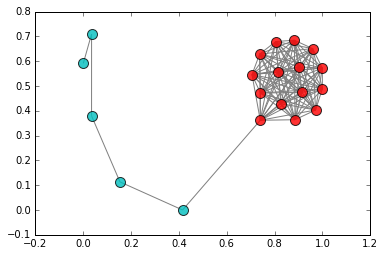

In [6]:
pos=nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=positive,
                       node_color='c',
                       node_size=100,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=negative,
                       node_color='r',
                       node_size=100,
                   alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,edge_color='gray')

```num_iter_fix``` $= 0.$

It may have bad convergence due to 

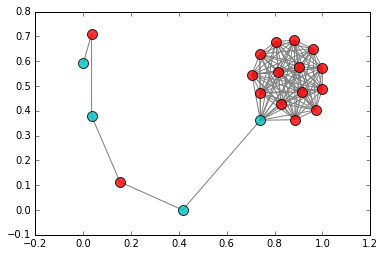

In [7]:
import networkx as nx

np.random.seed(17)
n, m = 15, 5
G = nx.lollipop_graph(n,m)
A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
x0 = np.random.rand(A.shape[0])
shift = 0.3
# iterfix 0
num_iter_fix = 0
num_iter_adapt = 1000
eps = 1e-10

x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)

positive = [i for i in range(0, x.shape[0]) if x[i] > 0]
negative = [i for i in range(0, x.shape[0]) if x[i] <= 0]

pos=nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=positive,
                       node_color='c',
                       node_size=100,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=negative,
                       node_color='r',
                       node_size=100,
                   alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,edge_color='gray')


#### Stanford Bunny (15 pts)

Let us now find a partition of a large graph, obtained from the 3D model from [The Stanford 3D Scanning Repository](http://graphics.stanford.edu/data/3Dscanrep/):<img src="stanford-bunny.jpg" width='250'>

* Install the [trimesh](https://pypi.python.org/pypi/trimesh) library. In order to visualize 3D model smoothly you will also need to install `pyglet` library (see trimesh instructions). Alternatively, you can draw and rotate model using 3D scatter in `matplotlib` with `%matplotlib notebook`.<span style="color:blue">$\checkmark$</span>


* Download the 3D model of the bunny [here](https://drive.google.com/open?id=1H_pqd2fInkkCKF5R9voVFJM53233G-Ax).<span style="color:blue">$\checkmark$</span>


* You can read it and display with `mesh = trimesh.load(<path>)` and `mesh.show()` respectively. Coordinates of the vertices and faces can be accessed with `mesh.vertices` and `mesh.faces` respectively. Note that not every vertex is a part of a face, you should filter them out.<span style="color:blue">$\checkmark$</span>


* Create an adjacency matrix of the graph corresponding to the mesh of the model (you can use `networkx` library for this). Verify that the number of connected components of the graph is exactly $1$.<span style="color:blue">$\checkmark$</span>


* Find the "bunny" partitioning for `num_iter_fix=1, num_iter_adapt=2` and `num_iter_fix=2, num_iter_adapt=10`. Plot the convergence rate for the second case and discuss it. Draw 3D model with coloring according to the partitions. With `trimesh` you can assign vertex colors as `mesh.visual.vertex_colors[<vertex>] = (R,G,B,A)`.<span style="color:blue">$\checkmark$</span>

In [103]:
mesh = trimesh.load('bun_zipper.ply')

In [104]:
#mesh.show()

Graph consists from 1 connected component.

In [105]:
G = nx.Graph()
G.add_edges_from(mesh.edges)
nodes = np.array(G.nodes())
nx.is_connected(G)

True

In [106]:
A = nx.adjacency_matrix(G)
np.random.seed(11)
x0 = np.random.rand(A.shape[0])

In [107]:
x_1, eigs_1 = partition(A, shift=0.003, num_iter_fix=1, num_iter_adapt=2, x0=x0, eps=1e-3)
x_2, eigs_2 = partition(A, shift=0.003, num_iter_fix=2, num_iter_adapt=10, x0=x0, eps=1e-10)

In [108]:
positive_1 = nodes[x_1 > 0]
negative_1 = nodes[x_1 <= 0]

positive_2 = nodes[x_2 > 0]
negative_2 = nodes[x_2 <= 0]

In [109]:
mesh.visual.vertex_colors[positive_1] = (180,180,180,255)
mesh.visual.vertex_colors[negative_1] = (255,155,170,255)

mesh.show()

<img src='bunny1.png', width=600px>

In [110]:
mesh.visual.vertex_colors[positive_2] = (180,180,180,255)
mesh.visual.vertex_colors[negative_2] = (255,155,170,255)

mesh.show()

<img src='bunny2.png', width=600px>

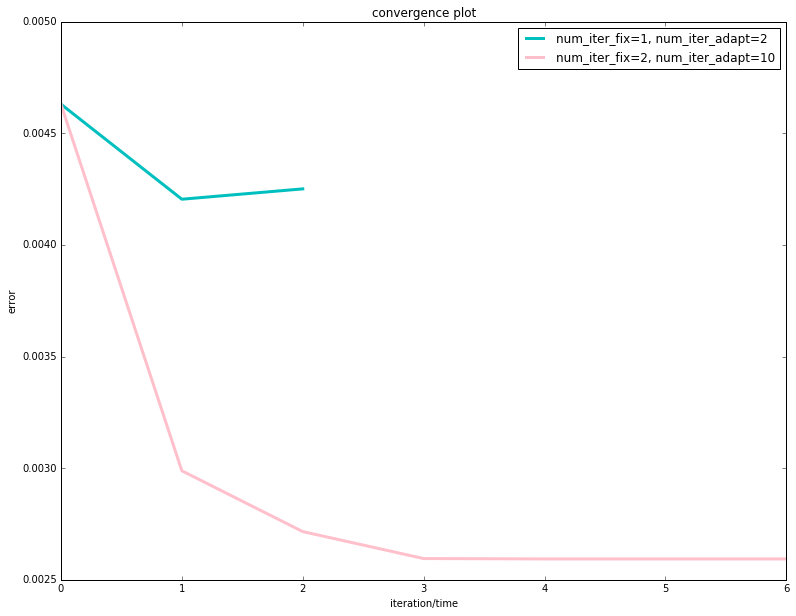

In [16]:
plt.figure(figsize=(13,10))
plt.plot(eigs_1, label='num_iter_fix=1, num_iter_adapt=2', lw=3, c='c')
plt.plot(eigs_2, label='num_iter_fix=2, num_iter_adapt=10', lw=3, c='pink')
plt.ylabel('error')
plt.xlabel('iteration/time')
plt.legend()
plt.title('convergence plot')
plt.show()

In the second case method converged to 2nd eigenvalue, it stopped with less number of iterations than maximum. The eigenvector was found very fast because adjacency matrix is symmetric and in this case wee have cubic speed.

## Problem 3 (30 pts)

## Sparse matrices and linear solvers

Consider a 2D convection-diffusion equation in $\Omega = [0,1]^2$
$$
-\frac{\partial^2 u}{\partial x^2} - \frac{\partial^2 u}{\partial y^2} + \frac{\partial u}{\partial x} + \frac{\partial u}{\partial y} = f(x,y), \quad (x,y)\in \Omega
$$ 
with zero Dirichlet boundary conditions
$$
u_{\partial \Omega} = 0,
$$
with known function $f(x,y)$ and unknown $u(x,y)$.

To find solution of this equation we will use the **finite difference method**. 
Standard second order finite difference discretization on a uniform grid $(x_i, y_j) = (ih, jh)$, $i,j = 0,\dots, N$, $h = \frac{1}{N}$ leads to the following system of equations:
$$
\begin{split}
   &-\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} - \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2} + \frac{u_{i+1, j} - u_{i,j}}{h} + \frac{u_{i, j+1} - u_{i,j}}{h} = f(ih, jh) \\
   &u_{0,j} = u_{i,0} = u_{N,j} = u_{i,N} = 0, \quad i,j = 0,\dots,N,
\end{split}
$$

* Write the system above as a matrix equation $BU_h + U_h C = F_h$ with  matrices $U_h = \begin{bmatrix}u_{1,1} & \dots & u_{1,N-1} \\ \vdots & \ddots & \vdots \\ u_{N-1,1} & \dots & u_{N-1,N-1} \end{bmatrix}$, $F_h = \begin{bmatrix}f_{1,1} & \dots & f_{1,N-1} \\ \vdots & \ddots & \vdots \\ f_{N-1,1} & \dots & f_{N-1,N-1} \end{bmatrix}$. What are matrices $B$ and $C$?

<span style="color:blue">_Solution_</span>.

$$
B = -\frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & \dots & 0 & 0\\
1 & -2 & 1 & 0 & \dots & 0 & 0\\
0 & 1 & -2 & 1 & \dots & 0 & 0\\
0 & 0 & 1 & -2 & \dots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 1 & -2\\
\end{bmatrix}
+ \frac{1}{h}
\begin{bmatrix}
-1 & 1 & 0 & 0 & \dots & 0 & 0\\
0 & -1 & 1 & 0 & \dots & 0 & 0\\
0 & 0 & -1 & 1 & \dots & 0 & 0\\
0 & 0 & 0 & -1 & \dots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 0 & -1\\
\end{bmatrix}
$$

$$
C = -\frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & \dots & 0 & 0\\
1 & -2 & 1 & 0 & \dots & 0 & 0\\
0 & 1 & -2 & 1 & \dots & 0 & 0\\
0 & 0 & 1 & -2 & \dots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 1 & -2\\
\end{bmatrix}
+ \frac{1}{h}
\begin{bmatrix}
-1 & 0 & 0 & 0 & \dots & 0 & 0\\
1 & -1 & 0 & 0 & \dots & 0 & 0\\
0 & 1 & -1 & 0 & \dots & 0 & 0\\
0 & 0 & 1 & -1 & \dots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 1 & -1\\
\end{bmatrix}
$$

* Using Kronecker product properties rewrite **analytically** $ BU_h + U_h C = F_h$ as $A_h \mathrm{vec}(U_h) = \mathrm{vec}(F_h)$, where $\mathrm{vec}(\cdot)$ is a columnwise reshape.
What is matrix $A_h$?

<span style="color:blue">_Solution_</span>.

$\mathrm{vec}(F_h) = \mathrm{vec}(BU_h + U_hC) = \mathrm{vec}(BU_h + U_hB^\top) = \mathrm{vec}(BU_h) + \mathrm{vec}(U_hB^\top) = \mathrm{vec}(BU_hI) + \mathrm{vec}(IU_hB^\top) = (I \otimes B)\mathrm{vec}(U_h) + (B \otimes I)\mathrm{vec}(U_h) = (I \otimes B + B \otimes I)\mathrm{vec}(U_h)$.

Thus, $A_h = (I \otimes B + B \otimes I).$

* Choose $f(x,y) = 1$. 
 Solve the system with this $f$ using the `scipy.sparse.linalg.spsolve` which is direct sparse solver. 
 Use ```pandas``` library and print table that contains $N$ and time of solving for $N=127, 255, 511$. 
 Matrices $B, C$ and $A_h$ should be assembled in the `CSR` format using functions from the `scipy.sparse` package (functions `scipy.sparse.kron` and `scipy.sparse.spdiags` will be helpful). <font color='red'> Do not use full matrices! Use only sparse arithmetics. </font>
 
<span style="color:blue">_Solution_</span>.

In [17]:
# INPUT: dimension of the grid along the one side of the square
# OUTPUT: matrix A_h for 2D convection-diffusion problem in CSR sparse format 
def build_matrix(N):  # 5 pts
    # Your code is here
    h = 1./(N)
    #eye(m[, n, k, dtype, format])
    data_m1 = np.ones(N-1)*(-1/h**2)
    data_0 = np.ones(N-1)*(2/h**2 -1/h)
    data_1 = np.ones(N-1)*(-1/h**2 + 1/h)
    data = np.vstack([data_m1, data_0, data_1])
    diags = np.array([-1, 0, 1])
    B = scipy.sparse.spdiags(data, diags, N-1, N-1)
    I = scipy.sparse.identity(N-1)
    A = scipy.sparse.kron(B, I) + scipy.sparse.kron(I, B)
    return A

In [18]:
# A_hvec(U_h) = vec(F_h)
times = []
for N in (127,255,511):
    start_time = time.time()
    A = build_matrix(N)
    F_h = np.ones((N-1)**2)
    U_h = scipy.sparse.linalg.spsolve(A, F_h)
    times.append(time.time()-start_time)

In [19]:
df_times = pd.DataFrame({
    'N': [127,255,511],
    'Time': times,
})
df_times

,N,Time
0,127,0.117078
1,255,0.570379
2,511,3.856559


* Fix initial random guess $x_0$, maximal number of iterations and required tolerance. These parameters will be the same for all iterative methods that you will test. <span style="color:blue">$\checkmark$</span>
* Run `cg`, `minres`, `GMRES`, `BicgStab` from `scipy.sparse.linalg` package with generated matrix for 2D convection-diffusion equation, right-hand side $f(x, y) = 1$ and above described parameters.<span style="color:blue">$\checkmark$</span>
* What are the iterative methods diverge and why?<span style="color:blue">$\checkmark$</span>
* What are the iterative methods of choice? Explain why. <span style="color:blue">$\checkmark$</span>

* Plot the relative residual norm $\frac{\|Ax_k - f\|_2}{\|f\|_2}$ w.r.t number of iteration and w.r.t elapsed time. Assume that every iteration lasts the same number of seconds <span style="color:blue">$\checkmark$</span>
* Run the methods of choice with and without ILU0 preconditioner (use it from `scipy.sparse` package) and Block Jacobi preconditioner for $N=256$. You should implement Block Jacobi preconditioner in the most efficient manner, in particular the most complex operation is solve linear systems with $N \times N$ matrix and multiple right-hand sides. Plot relative error w.r.t iteration number for both cases and for both preconditioners on one plot. Don't forget add legend. Also plot relative error w.r.t time in the similar way. Assume that every iteration lasts the same number of seconds <span style="color:blue">$\checkmark$</span>

<span style="color:blue">_Solution_</span>.

In [20]:
np.random.seed(17)
N = 256
x_0 = np.random.normal(size=(N-1)**2)
max_iter = 3000
eps = 1e-7
F_h = np.ones((N-1)**2)
A = build_matrix(N)

In [21]:
# Conjugate Gradient
x_cg, i_cg = scipy.sparse.linalg.cg(A=A, b=F_h, x0=x_0, tol=eps, maxiter=max_iter)

# Generalized Minimal RESidual iteration
x_gm, i_gm = scipy.sparse.linalg.gmres(A=A, b=F_h, x0=x_0, tol=eps, maxiter=max_iter)

# BIConjugate Gradient STABilized iteration
x_bs, i_bs = scipy.sparse.linalg.bicgstab(A=A, b=F_h, x0=x_0, tol=eps, maxiter=max_iter)

# MINimum RESidual iteration
x_mr, i_mr = scipy.sparse.linalg.minres(A=A, b=F_h, x0=x_0, tol=eps, maxiter=max_iter)

In [22]:
x_cg, i_cg, x_gm, i_gm, x_bs, i_bs, x_mr, i_mr

(array([  4.60317532e-05,   8.45847045e-05,   1.18660088e-04, ...,
          1.52021067e-04,   1.07172202e-04,   5.75131297e-05]),
 3000,
 array([  4.60317461e-05,   8.45846951e-05,   1.18660068e-04, ...,
          1.52021077e-04,   1.07172213e-04,   5.75131342e-05]),
 0,
 array([  4.60317475e-05,   8.45846979e-05,   1.18660073e-04, ...,
          1.52021082e-04,   1.07172216e-04,   5.75131357e-05]),
 0,
 array([  4.39490361e-05,   8.04063514e-05,   1.12382701e-04, ...,
          1.31507045e-04,   9.34614031e-05,   5.06374766e-05]),
 3000)

minimum residuals iteration method diverged beacuse given matrix in not symmetric

In [23]:
def solve(function, *args, **kwargs):
    def relative_residual(xk):
        Ax_k = args[0].dot(xk)
        res = np.linalg.norm(Ax_k - args[1])/np.linalg.norm(args[1])
        residuals.append(res)
    def relative_residual_gm(xk):
        residuals.append(xk)
    if function == scipy.sparse.linalg.gmres:
        kwargs['callback'] = relative_residual_gm
    else:
        kwargs['callback'] = relative_residual
    residuals = []
    x, i = function(*args, **kwargs)
    return x, i, np.array(residuals)

In [24]:
times = []
start_time = time.time()
x_cg, i_cg, res_cg = solve(scipy.sparse.linalg.cg, A, F_h, x0=x_0, tol=eps, maxiter=max_iter)
times.append(time.time()-start_time)
start_time = time.time()
x_gm, i_gm, res_gm = solve(scipy.sparse.linalg.gmres, A, F_h, x0=x_0, tol=eps, maxiter=max_iter)
times.append(time.time()-start_time)
start_time = time.time()
x_bs, i_bs, res_bs = solve(scipy.sparse.linalg.bicgstab, A, F_h, x0=x_0, tol=eps, maxiter=max_iter)
times.append(time.time()-start_time)
start_time = time.time()
x_mr, i_mr, res_mr = solve(scipy.sparse.linalg.minres, A, F_h, x0=x_0, tol=eps, maxiter=max_iter)
times.append(time.time()-start_time)

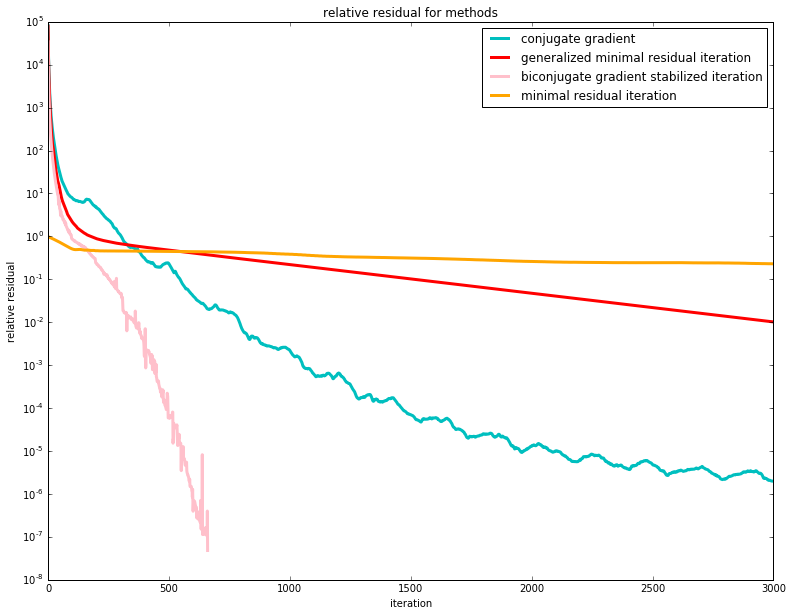

In [25]:
plt.figure(figsize=(13,10))
plt.semilogy() #ylogscaling
plt.plot(res_cg, label='conjugate gradient', lw=3, c='c')
plt.plot(res_gm, label='generalized minimal residual iteration', lw=3, c='red')
plt.plot(res_bs, label='biconjugate gradient stabilized iteration', lw=3, c='pink')
plt.plot(res_mr, label='minimal residual iteration', lw=3, c='orange')
plt.ylabel('relative residual')
plt.xlabel('iteration')
plt.legend()
plt.title('relative residual for methods')
plt.show()

In [26]:
len(res_cg)

3000

In [27]:
time_cg = np.ones(len(res_cg))/times[0]
times_cg = np.cumsum(time_cg)
time_gm = np.ones(len(res_gm))/times[1]
times_gm = np.cumsum(time_gm)
time_bs = np.ones(len(res_bs))/times[2]
times_bs = np.cumsum(time_bs)
time_mr = np.ones(len(res_mr))/times[3]
times_mr = np.cumsum(time_mr)

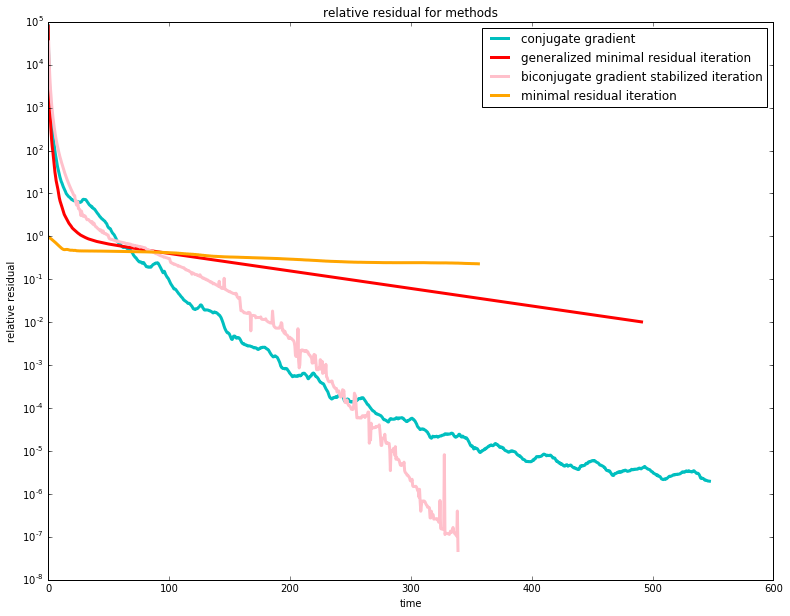

In [28]:
plt.figure(figsize=(13,10))
plt.semilogy() #ylogscaling
plt.plot(times_cg, res_cg, label='conjugate gradient', lw=3, c='c')
plt.plot(times_gm, res_gm, label='generalized minimal residual iteration', lw=3, c='red')
plt.plot(times_bs, res_bs, label='biconjugate gradient stabilized iteration', lw=3, c='pink')
plt.plot(times_mr, res_mr, label='minimal residual iteration', lw=3, c='orange')
plt.ylabel('relative residual')
plt.xlabel('time')
plt.legend()
plt.title('relative residual for methods')
plt.show()

Choose biconjugate gradient stabilized iteration, it has the best convergence.

ILU0 predictioner:

In [29]:
def ILU0_pr(A):
    invA_approx = scipy.sparse.linalg.spilu(A)
    mv = lambda x: invA_approx.solve(x)
    M = scipy.sparse.linalg.LinearOperator(A.shape, matvec=mv)
    return M

In [30]:
M = ILU0_pr(A)

In [31]:
time_lo = time.time()
x_bs, i_bs, res_bs_lo = solve(scipy.sparse.linalg.bicgstab, A, F_h, x0=x_0, tol=eps, maxiter=max_iter, M=M)
time_lo = time_lo - time.time()

In [32]:
time_lo = np.ones(len(res_bs_lo))/times[0]
times_lo = np.cumsum(time_lo)

Jacobi predictioner:

In [33]:
def Jacobi_pr(A, k):
    invA_approx = scipy.sparse.csr_matrix(A.shape)
    for i in range(A.shape[0]//k):
        Ai = A[i*k:(i+1)*k, i*k:(i+1)*k]
        invA_approx[i*k:(i+1)*k, i*k:(i+1)*k] = scipy.sparse.linalg.inv(Ai)
    mv = lambda x: invA_approx.dot(x)
    M = scipy.sparse.linalg.LinearOperator(A.shape, matvec=mv)
    return M

In [34]:
M = Jacobi_pr(A,5)

In [35]:
time_j_5 = time.time()
x_bs, i_bs, res_bs_j_5 = solve(scipy.sparse.linalg.bicgstab, A, F_h, x0=x_0, tol=eps, maxiter=max_iter, M=M)
time_j_5 = time.time() - time_j_5

In [36]:
time_j_5 = np.ones(len(res_bs_j_5))/times[0]
times_j_5 = np.cumsum(time_j_5)

In [37]:
M = Jacobi_pr(A,15)

In [38]:
time_j_15 = time.time()
x_bs, i_bs, res_bs_j_15 = solve(scipy.sparse.linalg.bicgstab, A, F_h, x0=x_0, tol=eps, maxiter=max_iter, M=M)
time_j_15 = time.time() - time_j_15

In [39]:
time_j_15 = np.ones(len(res_bs_j_15))/times[0]
times_j_15 = np.cumsum(time_j_15)

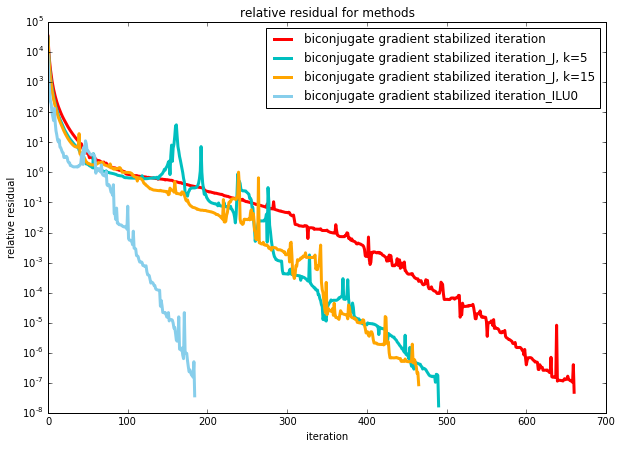

In [40]:
plt.figure(figsize=(10,7))
plt.semilogy() #ylogscaling
plt.plot(res_bs, label='biconjugate gradient stabilized iteration', lw=3, c='red')
plt.plot(res_bs_j_5, label='biconjugate gradient stabilized iteration_J, k=5', lw=3, c='c')
plt.plot(res_bs_j_15, label='biconjugate gradient stabilized iteration_J, k=15', lw=3, c='orange')
plt.plot(res_bs_lo, label='biconjugate gradient stabilized iteration_ILU0', lw=3, c='skyblue')
plt.ylabel('relative residual')
plt.xlabel('iteration')
plt.legend()
plt.title('relative residual for methods')
plt.show()

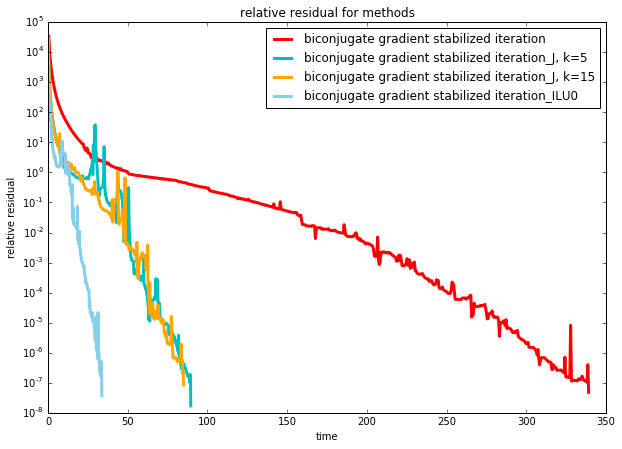

In [41]:
plt.figure(figsize=(10,7))
plt.semilogy() #ylogscaling
plt.plot(times_bs, res_bs, label='biconjugate gradient stabilized iteration', lw=3, c='red')
plt.plot(times_j_5, res_bs_j_5, label='biconjugate gradient stabilized iteration_J, k=5', lw=3, c='c')
plt.plot(times_j_15, res_bs_j_15, label='biconjugate gradient stabilized iteration_J, k=15', lw=3, c='orange')
plt.plot(times_lo, res_bs_lo, label='biconjugate gradient stabilized iteration_ILU0', lw=3, c='skyblue')
plt.ylabel('relative residual')
plt.xlabel('time')
plt.legend()
plt.title('relative residual for methods')
plt.show()

# Problem 4 (30 pts)

## Again QR, oh no!
<img src='qrcode.jpg', width=300px>

* In this problem you asked to find the convolution of the $n\times n$, $n=512$ QR(-code)  with the following filter
$$
T_{i_1j_1,i_2j_2} \equiv T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi} e^{-\alpha \left[(i_1 - j_1)^2 + (i_2 - j_2)^2 \right]}, \quad i_1,j_1, i_2, j_2 = 1,\dots, n, \quad \alpha = \frac{1}{100}
$$
using FFT. 
    * Write function `matvec` that produces multiplication of $T$ by a given vector $x$. <span style="color:blue">$\checkmark$</span>
    * Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.<span style="color:blue">$\checkmark$</span>
    * Convolve `qrcode.jpg` with $T$ for $\alpha = \frac{1}{100}$.Plot the result as an image. <span style="color:blue">$\checkmark$</span>
    * What is the complexity of this operation? 
    *
**Note:** You can use standart FFT, from e.q. `numpy.fft`


* Run an appropriate Krylov method(s) with the obtained Linear Operator and try to reconstruct back QR-code using the right-hand side from the first bullet (smoothed QR-code). <span style="color:blue">$\checkmark$</span>
* On one figure plot norm of residual with respect to the number of iterations for $\alpha = \{\frac{1}{50},~~\frac{1}{100},~~\frac{1}{200}\}$ and corresponding right hand side. Comment on the results.<span style="color:blue">$\checkmark$</span>


* **Bonus:** Find image `noisy_extra.jpg` in the attached to this problem set file. This image is the QR-code with the beautiful message, convolved with $T$, parameter $\alpha=\frac{1}{100}$ plus small random noise:
<img src='noisy_extra.jpg', width=300px>
    * Your goal now is to get the link from the image. Since the problem is very ill-posed you need some regularization, denoising or anything else.

In [69]:
#Function that will be provided into scipy.sparse.linalg.LinearOperator
#INPUT:  1D array vec and 
#        alpha with default value==1/100.
#OUTPUT: 1D array
#Hint: you can vary alpha using lambda function as argument of linalg.LinearOperator:
#      e.q.   lambda x: matvec(x, 1/50.)
def matvec(vec, alpha=1/100.):  # 15 pts
    n = int(np.sqrt(vec.shape[0]))
    x = vec.reshape(n, n)
    x_mesh, y_mesh = np.meshgrid(np.arange(-(n-1),n), np.arange(-(n-1),n))
    T = (alpha/np.pi)*np.exp(-alpha*(x_mesh**2 + y_mesh**2))
    Tx = scipy.signal.fftconvolve(x, T, mode = 'same').ravel()
    return Tx

In [70]:
def LO_T(n, alpha=1/100.):
    mv = lambda x: matvec(x, alpha)
    M = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec=mv)
    return M

In [71]:
im = Image.open('qrcode.jpg')
matrix = np.array(im.getdata()).reshape(im.size)
vec = np.reshape(matrix, -1)
n = int(np.sqrt(vec.shape[0]))
T = LO_T(n)

In [72]:
conv_vec = T.dot(vec)

In [73]:
conv_matrix = np.reshape(conv_vec, (n, n), order='C')

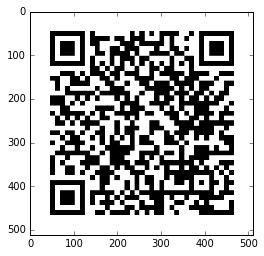

In [74]:
plt.imshow(matrix, cmap=plt.cm.gray)

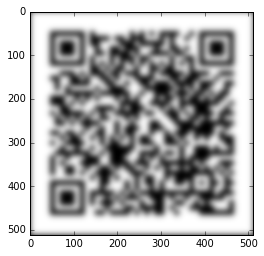

In [75]:
plt.imshow(conv_matrix, cmap=plt.cm.gray)

In [76]:
deconv_vec, info, residuals = solve(scipy.sparse.linalg.bicgstab, T, conv_vec, tol=1e-3, maxiter=200)

In [77]:
deconv_matrix = np.reshape(deconv_vec, (n, n), order='C')

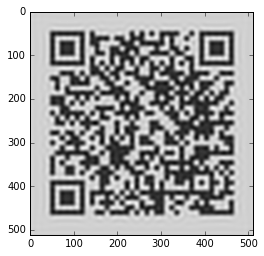

In [78]:
plt.imshow(deconv_matrix, cmap=plt.cm.gray)

In [96]:
T = LO_T(n, 1./50)
deconv_vec_50, info, residuals_50 = solve(scipy.sparse.linalg.cg, T, conv_vec, tol=1e-5, maxiter=300)

In [97]:
T = LO_T(n, 1./100)
deconv_vec_100, info, residuals_100 = solve(scipy.sparse.linalg.cg, T, conv_vec, tol=1e-5, maxiter=300)

In [98]:
T = LO_T(n, 1./200)
deconv_vec_200, info, residuals_200 = solve(scipy.sparse.linalg.cg, T, conv_vec, tol=1e-5, maxiter=300)

In [99]:
deconv_matrix_50 = np.reshape(deconv_vec_50, (n, n), order='C')
deconv_matrix_100 = np.reshape(deconv_vec_100, (n, n), order='C')
deconv_matrix_200 = np.reshape(deconv_vec_200, (n, n), order='C')

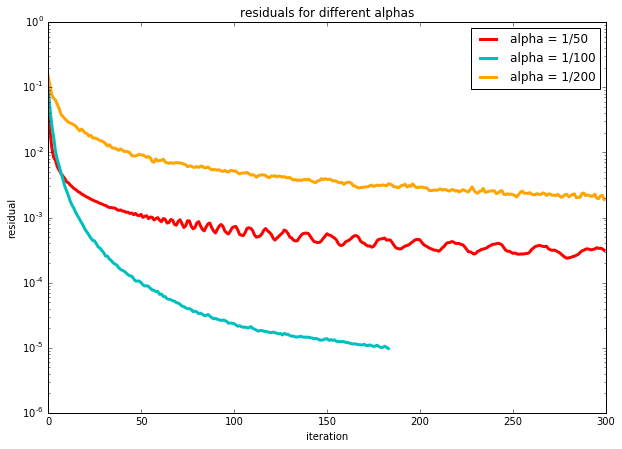

In [100]:
plt.figure(figsize=(10,7))
plt.semilogy() #ylogscaling
plt.plot(residuals_50, label='alpha = 1/50', lw=3, c='red')
plt.plot(residuals_100, label='alpha = 1/100', lw=3, c='c')
plt.plot(residuals_200, label='alpha = 1/200', lw=3, c='orange')
plt.ylabel('residual')
plt.xlabel('iteration')
plt.legend()
plt.title('residuals for different alphas')
plt.show()

When we do the deconvolution with alpha which is closer to real alpha, it works much more better and converges much more faster.

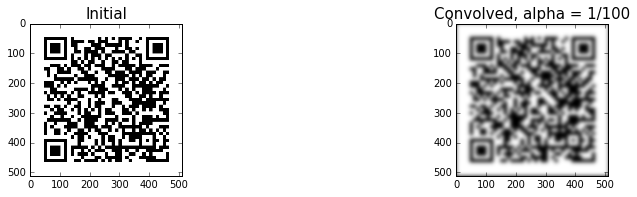

In [101]:
plt.figure(figsize=(14,6))
plt.subplot(221)
plt.title('Initial', fontsize=15)
plt.imshow(matrix, cmap=plt.cm.gray)
plt.subplot(222)
plt.title('Convolved, alpha = 1/100', fontsize=15)
plt.imshow(conv_matrix, cmap=plt.cm.gray)

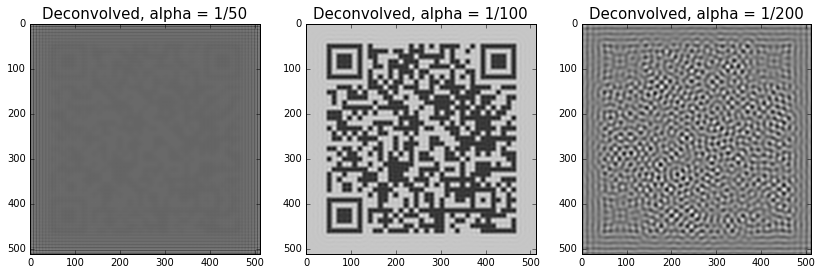

In [102]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.title('Deconvolved, alpha = 1/50', fontsize=15)
plt.imshow(deconv_matrix_50, cmap=plt.cm.gray)
plt.subplot(132)
plt.title('Deconvolved, alpha = 1/100', fontsize=15)
plt.imshow(deconv_matrix_100, cmap=plt.cm.gray)
plt.subplot(133)
plt.title('Deconvolved, alpha = 1/200', fontsize=15)
plt.imshow(deconv_matrix_200, cmap=plt.cm.gray)